In [27]:
import pandas as pd
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS




[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/abreham/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [28]:
df = pd.read_pickle('corpus.pkl')

In [29]:
df.head()

,clean_text,subjectivity,polarity
0,northstarcharts the yield is telling us that t...,0.540000,0.16
1,michaelaarouet german mortgage rate went from ...,0.175000,NaN
2,goldseek when,0.000000,0.00
3,charliebilello the mortgage rate in the us ris...,0.183333,0.00
4,biancoresearch rates rise until something brea...,0.400000,-0.40


In [32]:
for index, row in df['clean_text'].iteritems():
    score = SentimentIntensityAnalyzer().polarity_scores(row)
    if score['neg'] > score['pos']:
        df.loc[index, "sentiment"] = "negative"
    elif score['pos'] > score['neg']:
        df.loc[index, "sentiment"] = "positive"
    else:
        df.loc[index, "sentiment"] = "neutral"
        
    df.loc[index, 'neg'] = score['neg']
    df.loc[index, 'neu'] = score['neu']
    df.loc[index, 'pos'] = score['pos']
    
df.head(10)

,clean_text,subjectivity,polarity,sentiment,neg,neu,pos
0,northstarcharts the yield is telling us that t...,0.540000,0.160000,negative,0.104,0.896,0.000
1,michaelaarouet german mortgage rate went from ...,0.175000,NaN,neutral,0.000,1.000,0.000
2,goldseek when,0.000000,0.000000,neutral,0.000,1.000,0.000
3,charliebilello the mortgage rate in the us ris...,0.183333,0.000000,negative,0.095,0.905,0.000
4,biancoresearch rates rise until something brea...,0.400000,-0.400000,negative,0.256,0.744,0.000
5,lanceroberts buying opportunities like this on...,0.550000,-0.100000,positive,0.000,0.662,0.338
6,macroalf welcome to september\nbond markets te...,0.637500,0.400000,positive,0.088,0.714,0.197
7,botbenfranklin the horse thinks one thing and ...,0.000000,0.000000,neutral,0.000,1.000,0.000
8,galactictrader global growth optimism at all t...,0.250000,0.488281,positive,0.072,0.683,0.245
9,andreassteno this is the most important chart ...,0.750000,0.450000,negative,0.125,0.789,0.087


In [33]:
tweet_neg = df[df["sentiment"] == "negative"]
tweet_neu = df[df["sentiment"] == "neutral"]
tweet_pos = df[df["sentiment"] == "positive"]
#function for calculating the percentage of all the sentiments
def calc_percentage(x,y):
    return x/y * 100
pos_per = calc_percentage(len(tweet_pos), len(df))
neg_per = calc_percentage(len(tweet_neg), len(df))
neu_per = calc_percentage(len(tweet_neu), len(df))


print("positive: {} {}%".format(len(tweet_pos),  format(pos_per, '.1f')))
print("negative: {} {}%".format(len(tweet_neg), format(neg_per, '.1f')))
print("neutral: {} {}%".format(len(tweet_neu), format(neu_per, '.1f')))

positive: 6694 40.9%
negative: 4124 25.2%
neutral: 5549 33.9%


<BarContainer object of 3 artists>

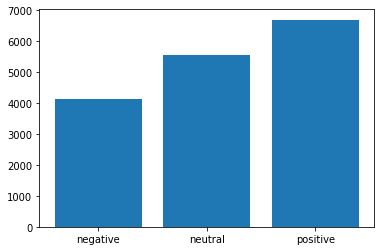

In [35]:
labels = df.groupby('sentiment').count().index.values
values = df.groupby('sentiment').size().values
plt.bar(labels, values)

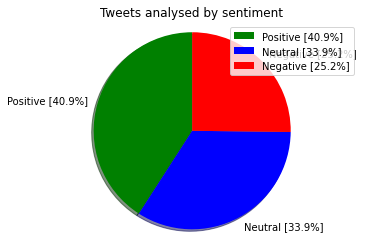

In [38]:
labels = ['Positive ['+format(pos_per, '.1f')+'%]', 'Neutral ['+format(neu_per,'.1f')+'%]', 'Negative ['+format(neg_per,'.1f')+'%]']
sizes = [len(tweet_pos), len(tweet_neu), len(tweet_neg)]
colors = ['green', 'blue', 'red']
patches, texts = plt.pie(sizes, labels = labels, colors = colors,shadow = True, startangle = 90)
plt.legend(labels)
plt.title("Tweets analysed by sentiment")
plt.axis('equal')
plt.show()

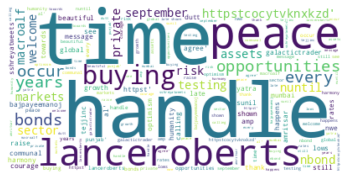

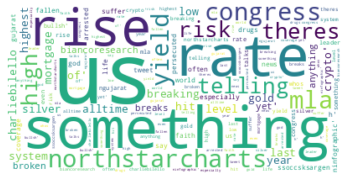

In [40]:
def create_wordcloud(text):
    stopwords = set(STOPWORDS)
    wc = WordCloud(background_color = "white", max_words = 3000, stopwords = stopwords, repeat = True)
    wc.generate(str(text))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.show()
#word cloud for positive sentiments
create_wordcloud(tweet_pos["clean_text"].values)
#wordcloud for negative sentimenst
create_wordcloud(tweet_neg["clean_text"].values)